In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Importing the dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Exploring Dataset

In [6]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [7]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [8]:
test_images.shape

(10000, 28, 28)

In [0]:
test_labels

In [12]:
len(test_labels)

10000

Displays the the 1st image in the form of an array

In [0]:
train_images[0]

Data Preprocessing

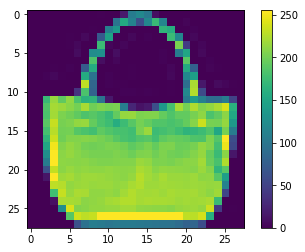

In [11]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display 1st 25 of the images

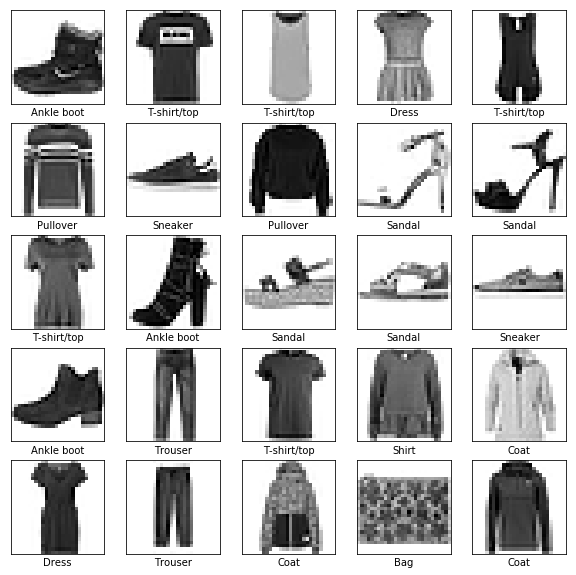

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Setting the Model

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 8s 136us/sample - loss: 1.1033 - acc: 0.6575
Epoch 2/12
60000/60000 [==============================] - 8s 126us/sample - loss: 0.6460 - acc: 0.7691
Epoch 3/12
60000/60000 [==============================] - 8s 127us/sample - loss: 0.5689 - acc: 0.7966
Epoch 4/12
60000/60000 [==============================] - 8s 126us/sample - loss: 0.5256 - acc: 0.8145
Epoch 5/12
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4969 - acc: 0.8254
Epoch 6/12
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4761 - acc: 0.8327
Epoch 7/12
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4617 - acc: 0.8371
Epoch 8/12
60000/60000 [==============================] - 8s 127us/sample - loss: 0.4491 - acc: 0.8415
Epoch 9/12
60000/60000 [==============================] - 8s 127us/sample - loss: 0.4399 - acc: 0.8448
Epoch 10/12
60000/60000 [==============================] - 8s 128us/sampl

Evaluating the model

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.4506 - acc: 0.8378
Test accuracy: 0.8378


Predict

In [0]:
predictions = model.predict(test_images)


In [30]:
predictions[0]

array([2.5002697e-07, 1.6226139e-08, 2.9927492e-06, 4.5126117e-06,
       6.4141727e-06, 1.1203800e-01, 6.7761321e-06, 2.2611253e-01,
       3.5466123e-03, 6.5828192e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

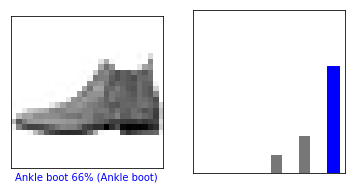

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

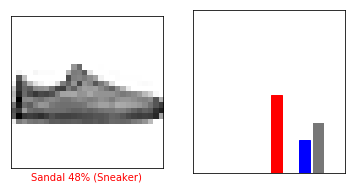

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

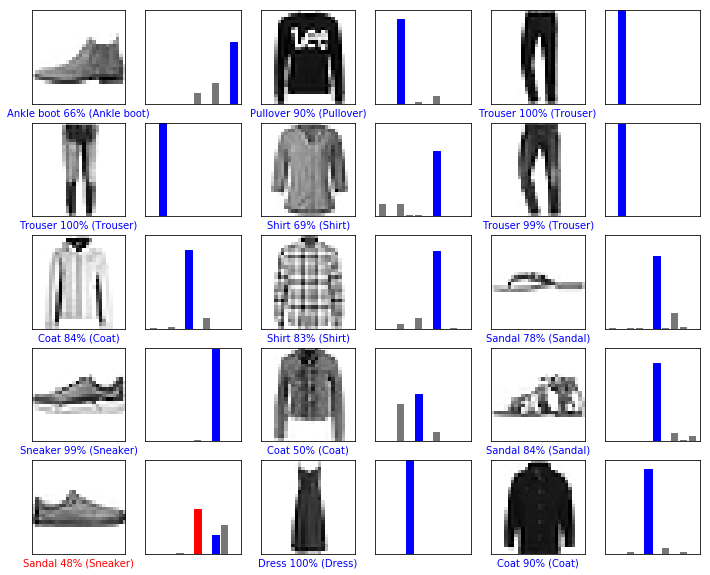

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [36]:
img = test_images[0]

print(img.shape)

(28, 28)


In [38]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [39]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.5002743e-07 1.6226231e-08 2.9927519e-06 4.5126203e-06 6.4141796e-06
  1.1203797e-01 6.7761321e-06 2.2611259e-01 3.5466123e-03 6.5828192e-01]]


In [40]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


In [41]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
